In [18]:
import io
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('merged_site_summaries.csv')
df.head()

,Unnamed: 0,n_vulns,vulns,total_cvss,max_cvss,site,Domain Name,Domain Type,Agency,Organization,City,State,Security Contact Email
0,0,0,set(),0.0,0.0,18F.GOV,18F.GOV,Federal Agency - Executive,General Services Administration,18F,Washington,DC,tts-vulnerability-reports@gsa.gov
1,1,0,set(),0.0,0.0,2020CENSUS.GOV,2020CENSUS.GOV,Federal Agency - Executive,Department of Commerce,U.S. Census Bureau,Suitland,MD,(blank)
2,2,5,"{'CVE-2010-3972', 'CVE-2012-2531', 'CVE-2010-1...",34.2,10.0,29PALMSBOMI-NSN.GOV,29PALMSBOMI-NSN.GOV,Native Sovereign Nation,Indian Affairs,Twenty-Nine Palms Band of Mission Indians,Coachella,CA,(blank)
3,3,0,set(),0.0,0.0,29PALMSGAMING-NSN.GOV,29PALMSGAMING-NSN.GOV,Native Sovereign Nation,Indian Affairs,Twenty-Nine Palms Band of Mission Indians,Coachella,CA,(blank)
4,4,0,set(),0.0,0.0,511WI.GOV,511WI.GOV,State/Local Govt,Non-Federal Agency,Wisconsin Department of Transportation,Madison,WI,(blank)


In [25]:
domain_types = df['Domain Type'].unique()
domain_types

array(['Federal Agency - Executive', 'Native Sovereign Nation',
       'State/Local Govt', 'City', 'County',
       'Federal Agency - Legislative', 'Independent Intrastate Agency',
       'Interstate Agency', 'Federal Agency - Judicial', nan], dtype=object)

In [28]:
d_rows = df.loc[np.isnan(df['Domain Type'])]
d_rows


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

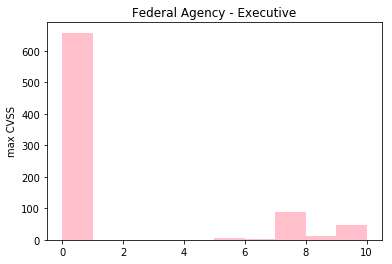

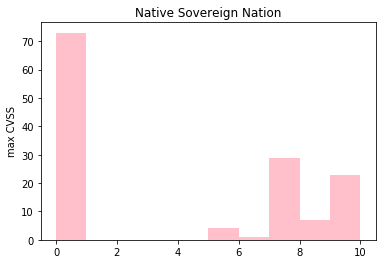

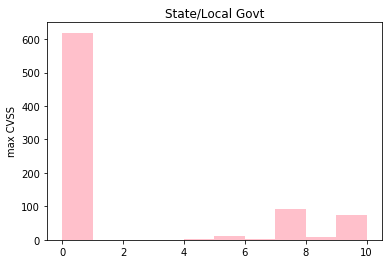

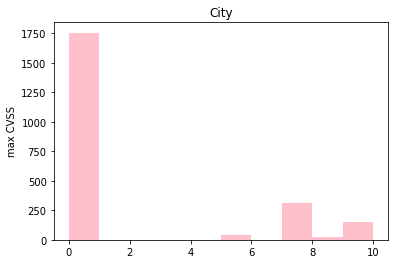

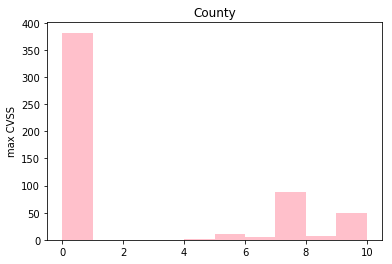

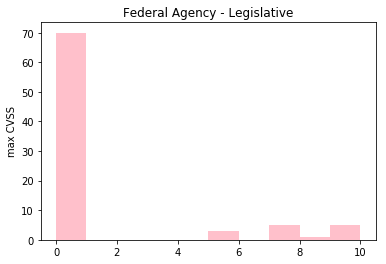

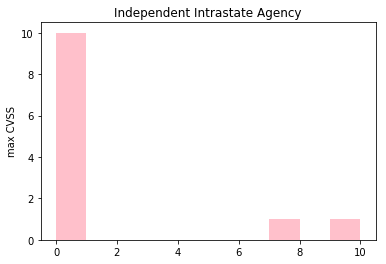

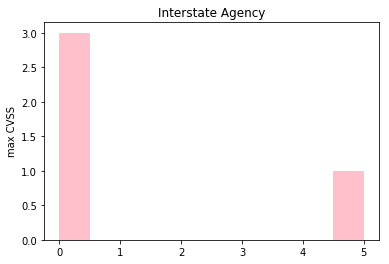

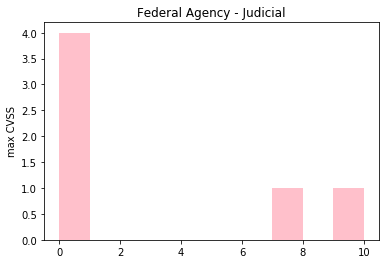

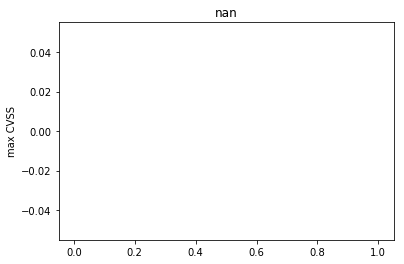

In [16]:
for d in domain_types:
    d_rows = df.loc[df['Domain Type'] == d]
    plt.hist(d_rows['max_cvss'], color='pink')
    plt.ylabel('max CVSS')
    plt.title(d)
    plt.show()

In [58]:
#find the means for each category
mean_total = {}
mean_max = {}
mean_vulns = {}
pro_vulns = {}

for d in domain_types:
    d_rows = df.loc[df['Domain Type'] == d]
    v = np.mean(d_rows['total_cvss'])
    m = np.mean(d_rows['max_cvss'])
    n_vulns = np.mean(d_rows['n_vulns'])
    if(len(d_rows > 0)):
        p_vulns = len(d_rows.loc[d_rows['n_vulns'] > 0]) / len(d_rows)
    else:
        p_vulns = 0
    if(math.isnan(v)):
        v = 0
        m = 0
        n_vulns = 0
    mean_total[d] = v
    mean_max[d] = m
    mean_vulns[d] = n_vulns
    pro_vulns[d] = p_vulns

#print(mean_total.values())

d_no_nan = []
for d in domain_types:
    if(pd.isnull(d)):
        d_no_nan.append('nan')
    else:
        d_no_nan.append(d)

#print(d_no_nan)
#print(mean_total.values())


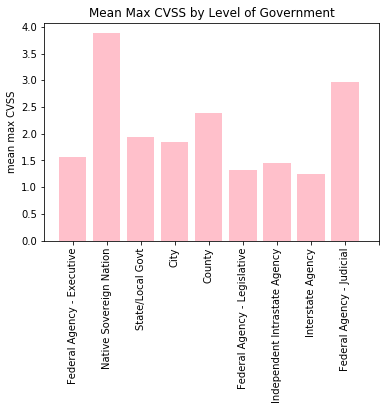

In [53]:
x = range(len(d_no_nan))
plt.bar(x[:-1], list(mean_max.values())[:-1], color='pink')
plt.xticks(x, d_no_nan[:-1], rotation=90)
plt.ylabel('mean max CVSS')
plt.title('Mean Max CVSS by Level of Government')
plt.show()

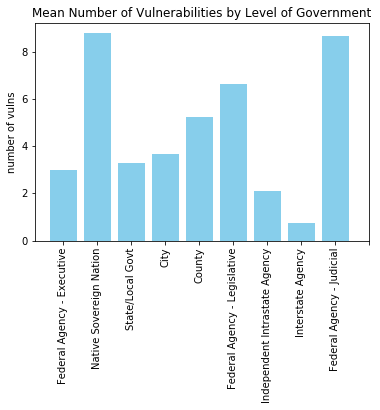

In [56]:
x = range(len(d_no_nan))
plt.bar(x[:-1], list(mean_vulns.values())[:-1], color='skyblue')
plt.xticks(x, d_no_nan[:-1], rotation=90)
plt.ylabel('number of vulns')
plt.title('Mean Number of Vulnerabilities by Level of Government')
plt.show()

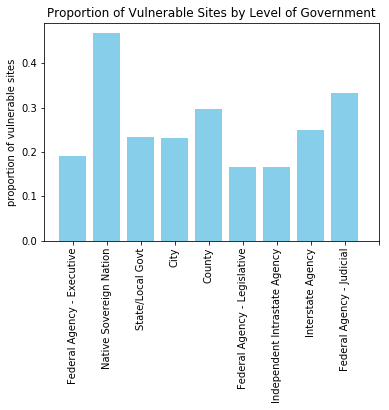

In [59]:
x = range(len(d_no_nan))
plt.bar(x[:-1], list(pro_vulns.values())[:-1], color='skyblue')
plt.xticks(x, d_no_nan[:-1], rotation=90)
plt.ylabel('proportion of vulnerable sites')
plt.title('Proportion of Vulnerable Sites by Level of Government')
plt.show()